In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv('stats_pl.csv')

In [3]:
df

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,...,765.0,165.0,22619.0,21.0,6.0,416.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,...,694.0,150.0,22775.0,26.0,1.0,439.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,...,800.0,227.0,24639.0,37.0,4.0,379.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,...,598.0,136.0,20368.0,33.0,3.0,402.0,0.0,27.0,14.0,2017-2018


## Calculando a média e a variância do Dataset

In [4]:
df.mean()

wins                       14.150000
losses                     14.150000
goals                      51.062500
total_yel_card             61.079167
total_red_card              2.862500
total_scoring_att         514.241667
ontarget_scoring_att      168.116667
hit_woodwork               12.283333
att_hd_goal                 9.016667
att_pen_goal                3.650000
att_freekick_goal           1.495833
att_ibox_goal              43.341667
att_obox_goal               7.741667
goal_fastbreak              2.983333
total_offside              86.291667
clean_sheet                10.945833
goals_conceded             51.062500
saves                      51.736364
outfielder_block          132.133333
interception              555.179167
total_tackle              762.133333
last_man_tackle             5.900000
total_clearance          1252.416667
head_clearance            675.236364
own_goals                   1.966667
penalty_conceded            4.750000
pen_goals_conceded          3.650000
t

In [5]:
df.var()

wins                    3.627029e+01
losses                  3.132469e+01
goals                   2.625526e+02
total_yel_card          1.015711e+02
total_red_card          3.248797e+00
total_scoring_att       9.212000e+03
ontarget_scoring_att    1.501476e+03
hit_woodwork            2.324156e+01
att_hd_goal             1.338884e+01
att_pen_goal            4.211715e+00
att_freekick_goal       1.782409e+00
att_ibox_goal           2.051966e+02
att_obox_goal           1.338905e+01
goal_fastbreak          5.849093e+00
total_offside           4.299899e+02
clean_sheet             1.722300e+01
goals_conceded          1.744940e+02
saves                   3.181674e+03
outfielder_block        1.020275e+03
interception            1.998350e+04
total_tackle            1.096297e+04
last_man_tackle         2.955481e+01
total_clearance         1.070817e+05
head_clearance          3.347567e+04
own_goals               2.166248e+00
penalty_conceded        5.117155e+00
pen_goals_conceded      3.726360e+00
t

## Calculando as medidas de dispersão de algumas colunas

In [6]:
df["head_clearance"].describe()

count     220.000000
mean      675.236364
std       182.963575
min       308.000000
25%       537.000000
50%       635.000000
75%       801.250000
max      1183.000000
Name: head_clearance, dtype: float64

In [7]:
df['corner_taken'].mean()

207.19166666666666

In [8]:
df['corner_taken'].median()

201.0

In [9]:
df['corner_taken'].mode()

0    181.0
dtype: float64

In [10]:
df['corner_taken'].std()

35.93317736722323

In [11]:
df['own_goals'].mean()

1.9666666666666666

In [12]:
df['own_goals'].median()

2.0

In [13]:
df['own_goals'].mode()

0    2.0
dtype: float64

In [14]:
df['own_goals'].std()

1.471818010701332

In [15]:
df['last_man_tackle'].mean()

5.9

In [16]:
df['last_man_tackle'].median()

4.0

In [17]:
df['last_man_tackle'].mode()

0    4.0
dtype: float64

In [18]:
df['last_man_tackle'].std()

5.436433731361137

## Plotando os Boxplot de alguma colunas

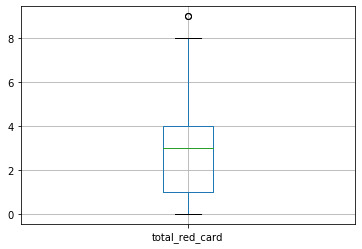

In [19]:

df.boxplot(column='total_red_card')



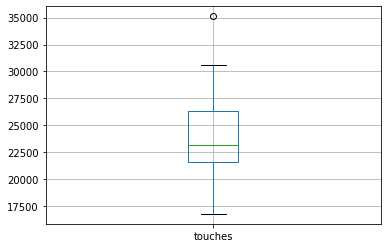

In [20]:
df.boxplot(column='touches')

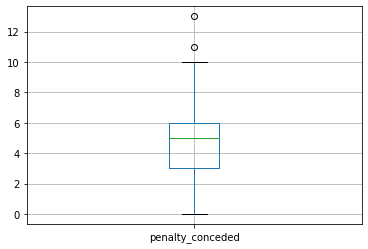

In [21]:
df.boxplot(column='penalty_conceded')

# Gráficos

## Gráfico de dispersão

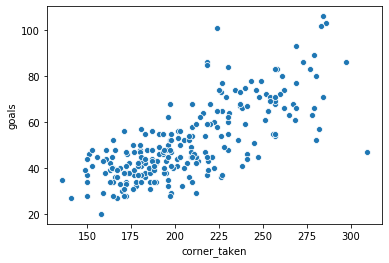

In [22]:
sns.scatterplot(data=df, x="corner_taken", y="goals")

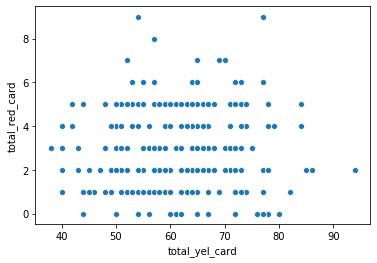

In [23]:
sns.scatterplot(data=df, x="total_yel_card", y="total_red_card")

## Histograma

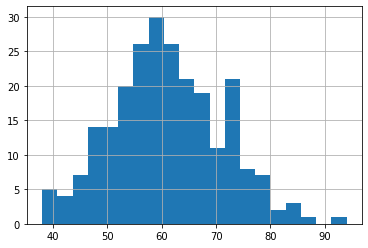

In [24]:
hist = df['total_yel_card'].hist(bins=20)

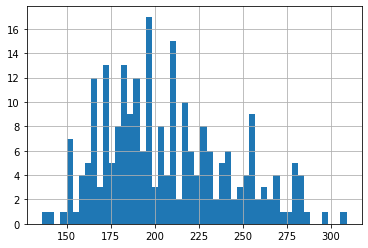

In [25]:
hist = df['corner_taken'].hist(bins=50)

## Gráfico de linha e Gráfico de barra

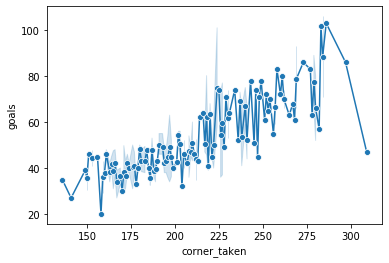

In [44]:
sns.lineplot(data=df, x="corner_taken", y="goals", marker='o')

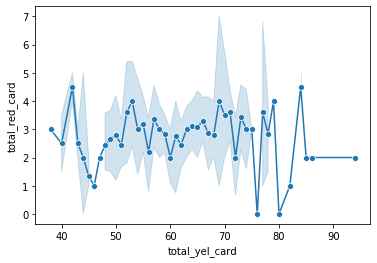

In [42]:
sns.lineplot(data=df, x="total_yel_card", y="total_red_card", marker='o')

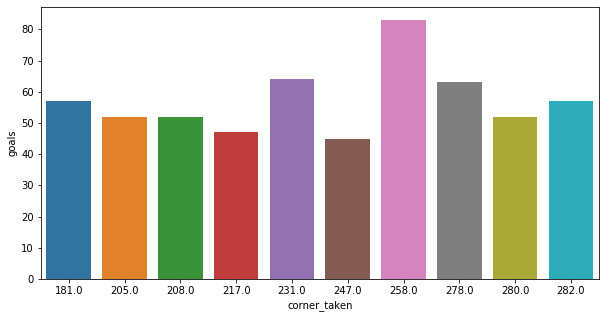

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(data=df[:10], x="corner_taken", y="goals")


## Matriz de correlação

In [37]:
corr = df.corr()
corr

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,...,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches
wins,1.000000,-0.890199,0.899236,-0.211276,-0.084818,0.753944,0.825577,0.512426,0.354752,0.398314,...,0.622935,0.208196,0.702131,0.704645,0.604178,-0.316998,0.260774,-0.032365,-0.162252,0.007351
losses,-0.890199,1.000000,-0.825820,0.235155,0.116112,-0.710323,-0.775273,-0.490826,-0.373599,-0.379356,...,-0.584510,-0.226708,-0.673469,-0.656575,-0.635046,0.293553,-0.273270,0.017236,0.147711,-0.010721
goals,0.899236,-0.825820,1.000000,-0.235392,-0.084373,0.788062,0.882988,0.564536,0.442670,0.492004,...,0.625073,0.216077,0.737691,0.733838,0.650628,-0.268003,0.269028,-0.000698,-0.222321,0.017450
total_yel_card,-0.211276,0.235155,-0.235392,1.000000,0.033770,-0.253648,-0.265842,-0.128863,-0.089670,-0.095150,...,-0.227163,-0.144025,-0.240047,-0.246781,-0.248291,-0.047345,-0.137412,-0.014418,0.094843,-0.073962
total_red_card,-0.084818,0.116112,-0.084373,0.033770,1.000000,-0.028250,-0.094543,-0.127432,-0.014242,0.038967,...,-0.106229,0.020976,-0.090034,-0.067673,0.032303,0.112337,-0.001112,0.062797,0.037623,0.089275
total_scoring_att,0.753944,-0.710323,0.788062,-0.253648,-0.028250,1.000000,0.938888,0.605026,0.271458,0.353282,...,0.521721,0.363540,0.794554,0.711154,0.726253,-0.174188,0.424606,-0.003246,-0.101241,0.138381
ontarget_scoring_att,0.825577,-0.775273,0.882988,-0.265842,-0.094543,0.938888,1.000000,0.626005,0.311790,0.395763,...,0.631762,0.257334,0.786692,0.767850,0.735622,-0.225950,0.373564,-0.005862,-0.166715,0.096687
hit_woodwork,0.512426,-0.490826,0.564536,-0.128863,-0.127432,0.605026,0.626005,1.000000,0.236210,0.191067,...,0.429798,0.170618,0.536658,0.531672,0.587715,-0.128247,0.162003,0.042172,-0.178729,-0.049829
att_hd_goal,0.354752,-0.373599,0.442670,-0.089670,-0.014242,0.271458,0.311790,0.236210,1.000000,0.132276,...,0.081814,0.299689,0.296625,0.173216,0.219387,-0.075413,0.108598,0.017676,-0.048019,-0.115129
att_pen_goal,0.398314,-0.379356,0.492004,-0.095150,0.038967,0.353282,0.395763,0.191067,0.132276,1.000000,...,0.186675,0.056393,0.332663,0.244434,0.308450,-0.094283,0.146317,0.020114,-0.017222,0.127869


In [38]:
corr.style.background_gradient(cmap='coolwarm') # mapa de correlação

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,total_offside,clean_sheet,goals_conceded,saves,outfielder_block,interception,total_tackle,last_man_tackle,total_clearance,head_clearance,own_goals,penalty_conceded,pen_goals_conceded,total_pass,total_through_ball,total_long_balls,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches
wins,1.000000,-0.890199,0.899236,-0.211276,-0.084818,0.753944,0.825577,0.512426,0.354752,0.398314,0.296696,0.869687,0.580104,0.519834,0.107766,0.768052,-0.808909,-0.078303,-0.564550,-0.047315,0.088477,-0.021521,-0.243472,-0.166257,-0.243475,-0.293302,-0.299222,0.701707,0.488155,-0.228135,0.622935,0.208196,0.702131,0.704645,0.604178,-0.316998,0.260774,-0.032365,-0.162252,0.007351
losses,-0.890199,1.000000,-0.825820,0.235155,0.116112,-0.710323,-0.775273,-0.490826,-0.373599,-0.379356,-0.276535,-0.794375,-0.549117,-0.495629,-0.188786,-0.765954,0.858343,0.155819,0.496228,0.003858,-0.135786,0.016309,0.191818,0.133663,0.235274,0.292474,0.313923,-0.646837,-0.460362,0.204358,-0.584510,-0.226708,-0.673469,-0.656575,-0.635046,0.293553,-0.273270,0.017236,0.147711,-0.010721
goals,0.899236,-0.825820,1.000000,-0.235392,-0.084373,0.788062,0.882988,0.564536,0.442670,0.492004,0.338198,0.978795,0.600258,0.529927,0.063181,0.573981,-0.624305,-0.123033,-0.536223,0.017756,0.046199,0.030470,-0.260985,-0.209374,-0.178164,-0.241914,-0.258272,0.730479,0.524357,-0.275572,0.625073,0.216077,0.737691,0.733838,0.650628,-0.268003,0.269028,-0.000698,-0.222321,0.017450
total_yel_card,-0.211276,0.235155,-0.235392,1.000000,0.033770,-0.253648,-0.265842,-0.128863,-0.089670,-0.095150,0.028478,-0.215091,-0.201515,-0.162337,-0.155795,-0.226382,0.205852,0.187392,0.111446,-0.020515,-0.086310,-0.110968,-0.019237,-0.004900,0.069851,0.157054,0.171979,-0.216048,-0.229037,0.137093,-0.227163,-0.144025,-0.240047,-0.246781,-0.248291,-0.047345,-0.137412,-0.014418,0.094843,-0.073962
total_red_card,-0.084818,0.116112,-0.084373,0.033770,1.000000,-0.028250,-0.094543,-0.127432,-0.014242,0.038967,-0.042838,-0.059267,-0.144343,-0.030283,-0.043030,-0.119583,0.133391,-0.074546,0.060422,0.163028,0.078958,0.149321,0.051053,0.047582,-0.009621,0.187536,0.174909,-0.107723,0.113898,-0.116108,-0.106229,0.020976,-0.090034,-0.067673,0.032303,0.112337,-0.001112,0.062797,0.037623,0.089275
total_scoring_att,0.753944,-0.710323,0.788062,-0.253648,-0.028250,1.000000,0.938888,0.605026,0.271458,0.353282,0.289672,0.748991,0.556219,0.490123,0.215873,0.558961,-0.610340,-0.321917,-0.555454,0.095135,0.249391,0.197783,-0.144269,-0.092071,-0.174547,-0.275878,-0.281627,0.642285,0.646561,-0.335641,0.521721,0.363540,0.794554,0.711154,0.726253,-0.174188,0.424606,-0.003246,-0.101241,0.138381
ontarget_scoring_att,0.825577,-0.775273,0.882988,-0.265842,-0.094543,0.938888,1.000000,0.626005,0.311790,0.395763,0.322234,0.850768,0.581264,0.526193,0.181203,0.576384,-0.626888,-0.232683,-0.571551,0.041574,0.178979,0.113231,-0.200642,-0.162419,-0.179602,-0.272514,-0.279921,0.732246,0.622360,-0.341806,0.631762,0.257334,0.786692,0.767850,0.735622,-0.225950,0.373564,-0.005862,-0.166715,0.096687
hit_woodwork,0.512426,-0.490826,0.564536,-0.128863,-0.127432,0.605026,0.626005,1.000000,0.236210,0.191067,0.156203,0.562179,0.302788,0.251968,0.080367,0.372393,-0.388184,-0.074970,-0.343447,0.059595,-0.016231,0.054088,-0.228989,-0.181953,-0.062349,-0.187613,-0.220844,0.529739,0.394701,-0.227261,0.429798,0.170618,0.536658,0.531672,0.587715,-0.128247,0.162003,0.042172,-0.178729,-0.049829
att_hd_goal,0.354752,-0.373599,0.442670,-0.089670,-0.014242,0.271458,0.311790,0.236210,1.000000,0.132276,0.077099,0.472941,0.108762,0.087028,0.009531,0.185495,-0.220155,-0.117135,-0.140208,0.011262,-0.077491,0.029531,-0.067032,-0.009149,-0.114104,-0.055099,-0.062554,0.170387,0.118817,-0.037376,0.081814,0.299689,0.2966